# **Machine Learning in Bioinformatics**

**Homework 3:**<br/>
!!! If you don't fill these fields, your homework does not count !!!<br/>
first name and last name : Ashkan Soleymani<br/>
student number : 95105635

You can run cells by hitting `Shift` + `Enter` or `ctrl` + `Enter`.<br/>
We highly recommend you to read each line of code carefully and try to 
understand what it exactly does.<br/>
Just alter the parts that is between green comments and specified for you. <br/>
Please do not change other parts.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import load_breast_cancer 


### about the Data:<br/>
The purpose of this project is to classify tumors into malignant or benign. The following dataset is constructed based on images of tumors. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.
For more details about the features of this dataset you can visit this link:
https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset<br/>
This dataset contains 30 features and 1 label called target.
The original dataset labels are 0 and 1 and in the following code boxes we change it to -1 and 1.

In [2]:
cancer = load_breast_cancer()  ## change if the data set changed
df = pd.DataFrame(np.c_[cancer["data"], cancer["target"]], columns = np.append(cancer["feature_names"],["target"]))
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [3]:
cancer.target = np.where(cancer.target==0, -1, cancer.target)
X_train ,X_test ,X_val ,y_train ,y_test ,y_val = None ,None ,None ,None ,None ,None
################################################################################
# TODO:                                                                        #
# 1- Normalize tha data.                                                       #
# 2- using train_test_split package, split your data into 3 numpy array        #
# called X_train, X_test, and X_val and also split the corresponding labels as #
# y_train, y_test, and y_val. After spliting, the ratio of your data should be # 
# approximately like this:                                                     #
#  Train : 70%     test : 20%       validation : 10%                           #
################################################################################

X, Y = cancer["data"], cancer["target"]
X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

X_train_validation, X_test, y_train_validation, y_test = train_test_split(X, Y, shuffle=True, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_validation, y_train_validation, test_size=1/8)

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################
print((X_train.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_train.shape[0]/cancer.data.shape[0]) * 100, "%")
print((X_test.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_test.shape[0]/cancer.data.shape[0]) * 100, "%")
print((X_val.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_val.shape[0]/cancer.data.shape[0]) * 100, "%")

69.94727592267135 %
69.94727592267135 %
20.035149384885763 %
20.035149384885763 %
10.017574692442881 %
10.017574692442881 %


# Ensemble Methods

## Problem 1. Bagging (15 points)


In [7]:
from sklearn import model_selection 
from sklearn.ensemble import BaggingClassifier 
import sklearn
from sklearn.tree import DecisionTreeClassifier 


################################################################################
# TODO : initialize the base classifier. You can choose one of the classifiers #
# you have learned in this course.(SVM/Decision tree)                          #
# IMPORTANT: if you are using SVM as base classifier don't forget to add column#
# of '1' s for bias and be careful to use the right dataset in next parts.      #
################################################################################
base_cls = DecisionTreeClassifier() 

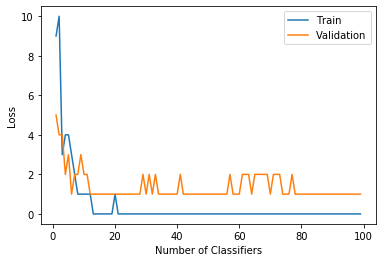

Best Number of Classifiers is:
6


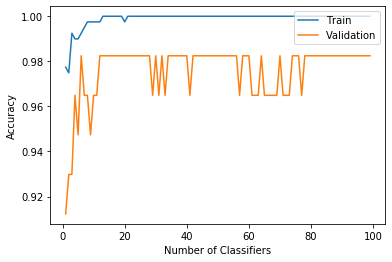

In [69]:
##################################################################################
# TODO: Number of classifiers is a hyperparameter. Choose it by using validation #
# data to have the best accuracy                                                 #
# For different number of classifiers, train the model with training data and    #
# compute accuracy for validation data. Plot accuracy-number of classifiers plot.#
##################################################################################
seed = 9

num_cls_candidates = range(1, 100)
loss_val_history = list()
loss_history = list()
for num_cls in num_cls_candidates:
    model = BaggingClassifier(base_estimator = base_cls, 
                          n_estimators = num_cls, 
                          random_state = seed)
    model.fit(X_train, y_train)
    loss_history.append(0.5 * (np.sum(np.abs(model.predict(X_train) - y_train))))
    loss_val_history.append(0.5 * (np.sum(np.abs(model.predict(X_val) - y_val))))


plt.plot([i for i in num_cls_candidates], loss_history, label="Train")
plt.plot([i for i in num_cls_candidates], loss_val_history, label="Validation")
plt.legend(loc="upper right")
plt.xlabel("Number of Classifiers")
plt.ylabel("Loss")
plt.show()    

num_cls = list(num_cls_candidates)[np.argmin(loss_val_history)]
print("Best Number of Classifiers is:")
print(num_cls)

plt.plot([i for i in num_cls_candidates], 1 - np.array(loss_history) / len(y_train), label="Train")
plt.plot([i for i in num_cls_candidates], 1 - np.array(loss_val_history)/ len(y_val), label="Validation")
plt.legend(loc="upper right")
plt.xlabel("Number of Classifiers")
plt.ylabel("Accuracy")
plt.show()   

In [70]:
model = BaggingClassifier(base_estimator = base_cls, 
                          n_estimators = num_cls, 
                          random_state = seed)
model.fit(X_train,y_train)

################################################################################
# compute and report the accuracy for test data.                               #
################################################################################
print("Loss for Test Data is:")
loss = 0.5 * (np.sum(np.abs(model.predict(X_test) - y_test)))
print(loss)
print("Accuracy for Test Data is:")
accuracy = 1 - loss / len(y_test)
print(accuracy)

Loss for Test Data is:
6.0
Accuracy for Test Data is:
0.9473684210526316


## Problem 2. Random Forest(25 points)</br>
In this part, you should write your own code to classify the data, using random forest from sklearn package in python.

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#################################################################################
# TODO:use the validation data to determine hyperparameters(number and depth of #
# trees) for the best accuracy                                                  # 
#################################################################################

seed = 9
number_of_trees_candidates = list(range(1, 30))
depth_of_trees_candidates = list(range(1, 30))
loss_val_history = [[] for _ in range(len(number_of_trees_candidates))]
loss_history = [[] for _ in range(len(number_of_trees_candidates))]
for i, number_of_trees in enumerate(number_of_trees_candidates):
    for depth_of_trees in depth_of_trees_candidates:
        model = RandomForestClassifier(n_estimators=number_of_trees, max_depth=depth_of_trees)
        model.fit(X_train, y_train)
        loss_history[i].append(0.5 * (np.sum(np.abs(model.predict(X_train) - y_train))))
        loss_val_history[i].append(0.5 * (np.sum(np.abs(model.predict(X_val) - y_val))))
        
loss_val_history, loss_history = np.array(loss_val_history), np.array(loss_history)
best_number_of_trees_index, best_depth_of_trees_index = np.unravel_index(loss_val_history.argmin(), loss_val_history.shape)
print("Best number and depth of trees are shown below repectively:")
number_of_trees, depth_of_trees = number_of_trees_candidates[best_number_of_trees_index], depth_of_trees_candidates[best_depth_of_trees_index]
print(number_of_trees, depth_of_trees)

Best number and depth of trees are shown below repectively:
3 3


In [6]:
#######################################################################################
#TODO:report accuracy, presition,recall and confusion matrix for train and test data  #
#######################################################################################

model = RandomForestClassifier(n_estimators=number_of_trees, max_depth=depth_of_trees)
model.fit(X_train, y_train)

def get_evaluation_metrics(Y_test, Y_pred):
    TP, FP, TN, FN = 0, 0, 0, 0
    P, N = 0, 0
    for i, j in zip(Y_test, Y_pred):
        if i == 1 and j == 1:
            TP += 1
            P += 1
        elif i == 1 and j == 0:
            FN += 1
            P += 1
        elif i == 0 and j == 1:
            FP += 1
            N += 1
        elif i == 0 and j == 0:
            TN += 1
            N += 1
    metrics = {"TP": TP, "FP": FP, "TN": TN, "FN": FN, "P":P, "N":N}
    return metrics

def get_confusion_matrix(Y_test, Y_pred):
    TP, FP, TN, FN = 0, 0, 0, 0
    for i, j in zip(Y_test, Y_pred):
        if i == 1 and j == 1:
            TP += 1
        elif i == 1 and j == -1:
            FN += 1
        elif i == -1 and j == 1:
            FP += 1
        elif i == -1 and j == -1:
            TN += 1
    return {"T (+1)": TP, "F (+1)": FP, "T (-1)": TN, "F (-1)": FN}

def get_accuracy(Y_test, Y_pred):
    conf_matrix = get_confusion_matrix(Y_test, Y_pred)
    return (conf_matrix["T (+1)"] + conf_matrix["T (-1)"]) / (conf_matrix["T (+1)"] + conf_matrix["T (-1)"] + conf_matrix["F (+1)"] + conf_matrix["F (-1)"])

def get_classification_report(Y_test, Y_pred):
    metrics = get_evaluation_metrics(Y_test, Y_pred)
    report = {}
    report["Recall"] = metrics["TP"] / metrics["P"]
    report["Precision"] = metrics["TP"] / (metrics["TP"] + metrics["FP"])
    report["F1 Score"] = 2 * metrics["TP"] / (2 * metrics["TP"] + metrics["FP"] + metrics["FN"])
    report["Accuracy"] = get_accuracy(Y_test, Y_pred)
    return report

y_pred = model.predict(X_train)
print("Train Data:")
print("Confusion Matrix is:")
print(get_confusion_matrix(y_train, y_pred))

print("Other metrics are evaluated as following:")
print(get_classification_report(y_train, y_pred))

y_pred = model.predict(X_test)
print("Test Data:")
print("Confusion Matrix is:")
print(get_confusion_matrix(y_test, y_pred))

print("Other metrics are evaluated as following:")
print(get_classification_report(y_test, y_pred))


Train Data:
Confusion Matrix is:
{'T (+1)': 245, 'F (+1)': 8, 'T (-1)': 141, 'F (-1)': 4}
Other metrics are evaluated as following:
{'Recall': 1.0, 'Precision': 1.0, 'F1 Score': 1.0, 'Accuracy': 0.9698492462311558}
Test Data:
Confusion Matrix is:
{'T (+1)': 73, 'F (+1)': 2, 'T (-1)': 36, 'F (-1)': 3}
Other metrics are evaluated as following:
{'Recall': 1.0, 'Precision': 1.0, 'F1 Score': 1.0, 'Accuracy': 0.956140350877193}


Question:
Explain how you did choose the hyperparameters.</br>

Simply by doing a search over all of the possible choices of the possible values for the hyperparameters by evaluating the trained models using validation data and choosing the best hyperparameters available. Instead of this approach one might prefer do gridsearch or some other search to find the best ones. 

## Problem 3. Boosting : AdaBoost (35 points)

In this part you should implement adaptive boosting algorithm. </br>
<picture>
  <img src="http://uupload.ir/files/b919_adaboost.png" alt="Adaboost" width="600" height="300">
</picture>



In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
X_train ,X_test ,y_train ,y_test = None ,None ,None ,None
###################################################################
# TODO: use 80% of normalized data as train and 20% as test data. #
###################################################################

X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.2)

######################################################################
#TODO : define a weak decision tree.                                 #
# initialize these parameters: criterion="entropy" and max_depth = 1 #
######################################################################
Tree_model = DecisionTreeClassifier(criterion="entropy" , max_depth = 1)
#############################################################################################
#TODO : report accuracy of your weak model on train and test data by using cross validation #
#############################################################################################
cv = 5
cross_validate_model = cross_validate(Tree_model,X, Y, cv=cv,
                                      return_estimator=True, return_train_score=True)
train_accuracy = np.mean(cross_validate_model['train_score']) 
print('The training data accuracy is:' ,train_accuracy * 100 , '%')

test_accuracy = np.mean(cross_validate_model['test_score']) 
print('The test data accuracy is:' ,test_accuracy * 100 , '%')

The training data accuracy is: 92.26756318108045 %
The test data accuracy is: 90.52250865717583 %


In [160]:
seed = 10

class AdaBoost:
    def __init__(self,train_data_X,train_data_y,tree_num,test_data_X,test_data_y):
        self.train_data_X = train_data_X
        self.train_data_y = train_data_y
        self.tree_num = tree_num
        self.test_data_X = test_data_X
        self.test_data_y = test_data_y
        self.alphas = None
        self.models = None
        self.accuracy = []
        self.predictions = None
        
    def fit(self):
        Evaluation = pd.DataFrame(self.train_data_y.copy())
        Evaluation.columns = ['target']
        ## TODO:Set the initial weights w = 1/N
        Evaluation['weights'] = [1 / len(self.train_data_y) for _ in range(len(self.train_data_y))] 
        
        alphas = [] #list of alphas 
        models = [] # list of trained models
        for t in range(self.tree_num):

            ## TODO: create a weak decisiontree classifier
            Tree_model = DecisionTreeClassifier(criterion="entropy" , max_depth = 1, random_state = 0)
            ## TODO: fit the model with train data. set the sample_weight parameter to the 'weights' columns in Evaluation dataframe
            model = Tree_model.fit(self.train_data_X, self.train_data_y, sample_weight=np.array(Evaluation['weights']))
            
            models.append(model)
            predictions = model.predict(self.train_data_X)
            score = model.score(self.train_data_X,self.train_data_y)

            ## Add this columns to the Evaluation DataFrame
            Evaluation['predictions'] = predictions
            ## TODO: In each row if the prediction and the target are equal,this column must be '1' and '0' O.W. 
            Evaluation['evaluation'] = np.equal(Evaluation['predictions'], Evaluation['target']).astype(int)
            ## TODO: In each row if the tha data is missclassified, this column must be 1.
            Evaluation['misclassified'] = np.not_equal(Evaluation['predictions'], Evaluation['target']).astype(int)

            ## TODO: Calculate the misclassification rate and accuracy and then use them to calculate error
            accuracy = np.mean(Evaluation['evaluation'])
            misclassification = np.mean(Evaluation['misclassified'])
            err = np.dot(Evaluation['misclassified'], Evaluation['weights'])
            
            ## TODO: Calculate the alpha values from the adaboost algorithm
            alpha = np.log((1 - err) / err)
            alphas.append(alpha)
            ## TODO: update the weights
            Evaluation['weights'] *= np.exp((alpha / 2)*Evaluation['misclassified'])
            Evaluation['weights'] *= np.exp(-(alpha / 2)*Evaluation['evaluation'])
            Evaluation['weights'] /= np.sum(Evaluation['weights'])﷼

        self.alphas = alphas
        self.models = models
        
        
    def predict(self, train=False):
        
        accuracy = []
        predictions = []
        #####################################################################################
        #TODO:                                                                              #
        # 1- predict target for test data and append each prediction to the predictions list#
        # 2- Create a list of accuracies which can be used to plot the accuracy against the #
        # number of base learners used for the model                                        #
        #####################################################################################
        for alpha, model in zip(self.alphas, self.models):
            if train:
                prediction = model.predict(self.train_data_X) 
                predictions.append(alpha * prediction)
                overall_prediction = np.sign(np.sum(np.array(predictions),axis=0))
                accuracy.append(sklearn.metrics.accuracy_score(self.train_data_y, overall_prediction, normalize=True))
            else:
                prediction = model.predict(self.test_data_X) 
                predictions.append(alpha * prediction)
                overall_prediction = np.sign(np.sum(np.array(predictions),axis=0))
                accuracy.append(sklearn.metrics.accuracy_score(self.test_data_y, overall_prediction, normalize=True))

            
        self.predictions = np.sign(np.sum(np.array(predictions),axis=0))
        return accuracy


With a number of  100 base models we receive a training accuracy of  100.0 %
With a number of  100 base models we receive a test accuracy of  99.12280701754386 %


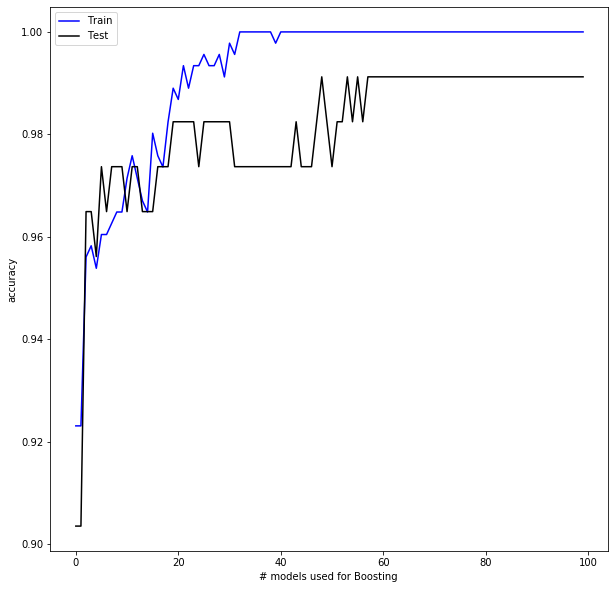

In [161]:
# Accuracy - number of base learners plot for training data

number_of_base_learners = 100

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)


for i in range(number_of_base_learners):
    model = AdaBoost(X_train,y_train,number_of_base_learners,X_test,y_test)
    model.fit()
    accuracy = model.predict(train=True)

ax0.set_xlabel('# models used for Boosting ')
ax0.set_ylabel('accuracy')

ax0.plot(range(len(accuracy)),accuracy,'-b', label="Train")
print('With a number of ',number_of_base_learners,'base models we receive a training accuracy of ',accuracy[-1]*100,'%')    
                   
#################################################################### 
# TODO: Plot Accuracy - number of base learners plot for test data #
####################################################################  

accuracy = model.predict(train=False)

ax0.plot(range(len(accuracy)),accuracy,'black', label="Test")
print('With a number of ',number_of_base_learners,'base models we receive a test accuracy of ',accuracy[-1]*100,'%')

ax0.legend()
plt.show()

# Feature Selction </br>

## problem4. Filtering : correlation coefficient (25 points)


In [211]:
################################################################################# 
# TODO:                                                                         #
# use 80% of normalized data as train and 20% as test data.(just use the data   # 
# from last part)                                                               #
# 1- compute the correlation coefficient between each feature and target.       #
# 2- Report the features that their correlation is more than 0.5                #
# 3- compute the correlation between the features you reported in 2nd           #
# section and report features that their correlation with other features        #
# is less than 0.5                                                              #
# 4- use perceptron from sklearn package to classify the data. Report accurracy #
# for test data and sort the features based on their weights in perceptron.     #
# IMPORTANT: Don't forget to add 1s to the end of feature vectors to be         #
# multiplied by bias term of weight in perceptron.                              #
# 5- compare the features you reported in section 2 and 3 with the features     #
# that have the most weights in perceptron and write your analysis below        #
# 6 - Classify data with perceptron and use only the features you repoted in    # 
# section 2 and report accuracy for test data.                                  #
# 7 - Do the same with section 3 and compare accuracies.                        #
#################################################################################

# 1- compute the correlation coefficient between each feature and target. 
featureVStarget_corrcoef = [np.corrcoef(X_train[:,i],y_train)[0,1] for i in range(len(X_train[0]))]
# print(featureVStarget_corrcoef)

# 2- Report the features that their correlation is more than 0.5
featureVStarget_selected_features = np.where(np.abs(featureVStarget_corrcoef)>0.5)[0]
print("Selected Features indices are:" , featureVStarget_selected_features)

# 3- compute the correlation between the features you reported in 2nd           #
# section and report features that their correlation with other features        #
# is less than 0.5  
selected_features_corr_matrix = np.corrcoef(X_train[:, featureVStarget_selected_features], rowvar=False)
evaluation_dict = {}
for i, feature in enumerate(featureVStarget_selected_features):
    evaluation_dict[feature] = np.sum(selected_features_corr_matrix[i] < 0.5)
from operator import itemgetter
less_correlated_features = list(reversed(sorted(evaluation_dict.items(), key=itemgetter(1))))[0:3]
less_correlated_features = [i[0] for i in less_correlated_features]
print("Three less corralated features are:", less_correlated_features)

# 4- use perceptron from sklearn package to classify the data. Report accurracy #
# for test data and sort the features based on their weights in perceptron.     #
# IMPORTANT: Don't forget to add 1s to the end of feature vectors to be         #
# multiplied by bias term of weight in perceptron.
from sklearn.linear_model import Perceptron
train_x = np.append(X_train, np.ones((len(X_train), 1)), axis=1)
test_x = np.append(X_test, np.ones((len(X_test), 1)), axis=1)
clf = Perceptron()
clf.fit(train_x, y_train)
coef_tuples = [(np.abs((clf.coef_)[0][i]), i) for i in range(len(X_train[0]))]
sorted_coefs_indices = [i[1] for i in sorted(coef_tuples, reverse=True)]
print("Feature indices sorted by their weights are as following(Note that normalized data is used):")
print(sorted_coefs_indices)
print("Accuracy for Test Data is:", accuracy_score(clf.predict(test_x),y_test))

# 5- compare the features you reported in section 2 and 3 with the features     #
# that have the most weights in perceptron and write your analysis below        #

########---- No Code is Needed. Notes can be found following the code section

# 6 - Classify data with perceptron and use only the features you repoted in    # 
# section 2 and report accuracy for test data. 
train_x = np.append(X_train[:, featureVStarget_selected_features], np.ones((len(X_train), 1)), axis=1)
test_x = np.append(X_test[:, featureVStarget_selected_features], np.ones((len(X_test), 1)), axis=1)
clf = Perceptron()
clf.fit(train_x, y_train)
print("Accuracy for Test Data is Using Section 2 Features:", accuracy_score(clf.predict(test_x),y_test))

# 7 - Do the same with section 3 and compare accuracies. 
train_x = np.append(X_train[:, less_correlated_features], np.ones((len(X_train), 1)), axis=1)
test_x = np.append(X_test[:, less_correlated_features], np.ones((len(X_test), 1)), axis=1)
clf = Perceptron()
clf.fit(train_x, y_train)
print("Accuracy for Test Data is Using Section 3 Features:", accuracy_score(clf.predict(test_x),y_test))


Selected Features indices are: [ 0  2  3  5  6  7 10 12 13 20 22 23 25 26 27]
Three less corralated features are: [25, 5, 26]
Feature indices sorted by their weights are as following(Note that normalized data is used):
[10, 21, 7, 28, 20, 6, 24, 27, 12, 9, 15, 1, 23, 13, 22, 26, 3, 0, 2, 19, 5, 4, 14, 16, 17, 8, 29, 11, 25, 18]
Accuracy for Test Data is: 0.9649122807017544
Accuracy for Test Data is Using Section 2 Features: 0.9210526315789473
Accuracy for Test Data is Using Section 3 Features: 0.8421052631578947


explanation of part 5 and 6:

 Features selected in Section 2 & 3 are mostly the ones with the larger weights in Perceptron analysis. Noting that we used normalized data to fit Perceptron model, weights induced by this model are independent of scaling and more likely to be affected by corrspondence metrics like correlation.

Question: Is it important to extract features before classifying using methods like decision tree and SVM? why? 

Yes, for sure; As in this by even using such a simple model we have got nearly the same results using less number of variables by some preprocessing. Not only it's beneficial as it takes less computation cost and hardware to train approximately models as well as usual ones (using all the features) but also it reduces the model variance as these preprocessings will remove irrelevent and redundant features and decrease the chance of overfitting to data. Also it's worth mentioning that using less variables, more complex models can be trained without overffiting which kind of reduces model bias w.r.t same model variance. Morover, manipulating real data, interpreting less variables having low dependency is much easier than other cases.

## problem 5. mRMR (10 bonus points) </br>
In this part you should write your own code and classify the data using mRMR method.You can use "pymrmr" package for this part.

In [16]:
import pymrmr

df2 = pd.DataFrame(np.concatenate((y_train.reshape(-1,1), X_train),axis=1), columns=["target"] + features)
selected_feature_indices = pymrmr.mRMR(df2, 'MIQ', 10)
print(selected_feature_indices)

['worst texture', 'worst compactness', 'compactness error', 'symmetry error', 'perimeter error', 'worst smoothness', 'smoothness error', 'worst concave points', 'worst symmetry', 'mean texture']


In [27]:
from sklearn.ensemble import RandomForestClassifier

selected_feature_names = ['worst texture', 'worst compactness', 'compactness error', 'symmetry error', 'perimeter error', 'worst smoothness', 'smoothness error', 'worst concave points', 'worst symmetry', 'mean texture']
selected_features = [df.columns.get_loc(name) for name in selected_feature_names]
model = RandomForestClassifier(n_estimators=20, max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

def get_evaluation_metrics(Y_test, Y_pred):
    TP, FP, TN, FN = 0, 0, 0, 0
    P, N = 0, 0
    for i, j in zip(Y_test, Y_pred):
        if i == 1 and j == 1:
            TP += 1
            P += 1
        elif i == 1 and j == 0:
            FN += 1
            P += 1
        elif i == 0 and j == 1:
            FP += 1
            N += 1
        elif i == 0 and j == 0:
            TN += 1
            N += 1
    metrics = {"TP": TP, "FP": FP, "TN": TN, "FN": FN, "P":P, "N":N}
    return metrics

def get_confusion_matrix(Y_test, Y_pred):
    TP, FP, TN, FN = 0, 0, 0, 0
    for i, j in zip(Y_test, Y_pred):
        if i == 1 and j == 1:
            TP += 1
        elif i == 1 and j == -1:
            FN += 1
        elif i == -1 and j == 1:
            FP += 1
        elif i == -1 and j == -1:
            TN += 1
    return {"T (+1)": TP, "F (+1)": FP, "T (-1)": TN, "F (-1)": FN}

def get_accuracy(Y_test, Y_pred):
    conf_matrix = get_confusion_matrix(Y_test, Y_pred)
    return (conf_matrix["T (+1)"] + conf_matrix["T (-1)"]) / (conf_matrix["T (+1)"] + conf_matrix["T (-1)"] + conf_matrix["F (+1)"] + conf_matrix["F (-1)"])

def get_classification_report(Y_test, Y_pred):
    metrics = get_evaluation_metrics(Y_test, Y_pred)
    report = {}
    report["Recall"] = metrics["TP"] / metrics["P"]
    report["Precision"] = metrics["TP"] / (metrics["TP"] + metrics["FP"])
    report["F1 Score"] = 2 * metrics["TP"] / (2 * metrics["TP"] + metrics["FP"] + metrics["FN"])
    report["Accuracy"] = get_accuracy(Y_test, Y_pred)
    return report

print("Confusion Matrix is:")
print(get_confusion_matrix(y_test, y_pred))

print("Other metrics are evaluated as following:")
print(get_classification_report(y_test, y_pred))


Confusion Matrix is:
{'T (+1)': 73, 'F (+1)': 2, 'T (-1)': 38, 'F (-1)': 1}
Other metrics are evaluated as following:
{'Recall': 1.0, 'Precision': 1.0, 'F1 Score': 1.0, 'Accuracy': 0.9736842105263158}
